# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [184]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [7]:
fitbit = pd.read_csv("../data/Fitbit2.csv")

In [10]:
display(fitbit)

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2016-05-03,3796,18588,14.13,16,599.000,275,49,79,236,...,8.779972,Tuesday,1.0,1,6.283333,91.951220,5.233333,90.229885,May,5
363,2016-05-04,3525,16382,12.39,16,684.000,333,10,55,2075,...,7.698787,Wednesday,2.0,1,6.766667,95.081967,6.283333,91.951220,May,5
364,2016-05-05,3649,21913,16.40,19,701.000,287,29,90,2249,...,10.190484,Thursday,3.0,1,4.666667,88.888889,6.766667,95.081967,May,5
365,2016-05-06,3539,19023,14.79,15,575.000,298,8,85,2112,...,9.190077,Friday,4.0,1,6.166667,89.805825,4.666667,88.888889,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [36]:
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'

In [89]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,4.)})
sns.set_style("whitegrid")

In [138]:
steps_mean_months_laborable = fitbit.groupby(["Months_encoded", "Work_or_Weekend"]).mean()["Steps"]
steps_mean_months_laborable

Months_encoded  Work_or_Weekend
1               0                   9618.400000
                1                  10022.380952
2               0                  10882.250000
                1                   8210.363636
3               0                   4941.250000
                1                  12181.347826
4               0                   8285.666667
                1                  15133.333333
5               0                  15005.900000
                1                   8531.619048
6               0                  12717.125000
                1                  12470.363636
7               0                   8851.000000
                1                   9312.391304
8               0                  12462.900000
                1                  11166.619048
9               0                   7846.750000
                1                   9680.272727
10              0                   9441.333333
                1                   7794.272727
11      

In [140]:
steps_mean_months_laborable.index

MultiIndex([( 1, 0),
            ( 1, 1),
            ( 2, 0),
            ( 2, 1),
            ( 3, 0),
            ( 3, 1),
            ( 4, 0),
            ( 4, 1),
            ( 5, 0),
            ( 5, 1),
            ( 6, 0),
            ( 6, 1),
            ( 7, 0),
            ( 7, 1),
            ( 8, 0),
            ( 8, 1),
            ( 9, 0),
            ( 9, 1),
            (10, 0),
            (10, 1),
            (11, 0),
            (11, 1),
            (12, 0),
            (12, 1)],
           names=['Months_encoded', 'Work_or_Weekend'])

In [74]:
# AVERAGE STEPS BY MONTH_ENCODED
steps_mean_month = fitbit.groupby(["Months_encoded"])["Steps"].mean()
steps_mean_month

Months_encoded
1      9892.064516
2      8922.866667
3     10312.935484
4     13079.033333
5     10620.096774
6     12536.166667
7      9193.322581
8     11584.774194
9      9191.333333
10     8272.451613
11     9467.466667
12     8470.064516
Name: Steps, dtype: float64

<AxesSubplot:xlabel='Months_encoded'>

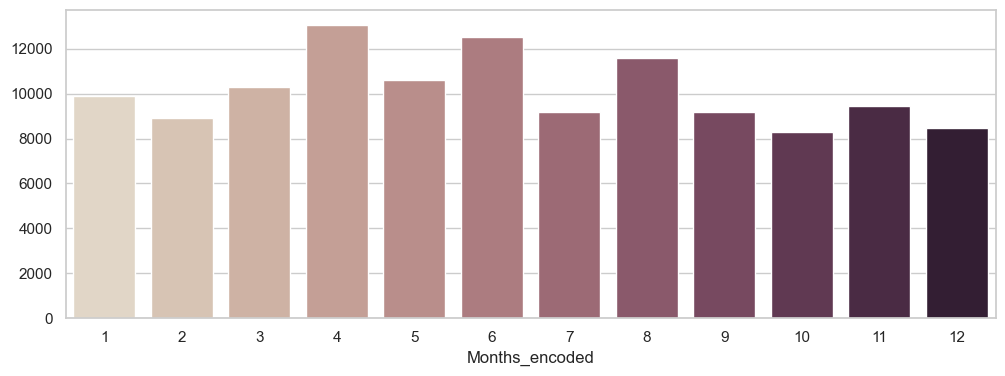

In [90]:
sns.barplot(x=steps_mean_month.index, y=steps_mean_month.values, palette="ch:.25")

In [76]:
# AVERAGE STEPS BY WORK_OR_WEEKEND
steps_mean_work_weekend = fitbit.groupby(["Work_or_Weekend"])["Steps"].mean()
steps_mean_work_weekend

Work_or_Weekend
0    10064.238095
1    10144.572519
Name: Steps, dtype: float64

<AxesSubplot:xlabel='Work_or_Weekend'>

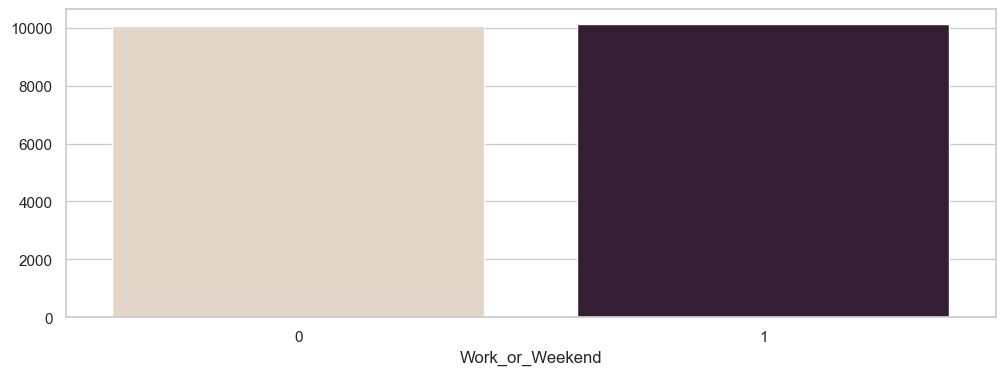

In [99]:
sns.barplot(x=steps_mean_work_weekend.index, y=steps_mean_work_weekend.values, palette="ch:.25")

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

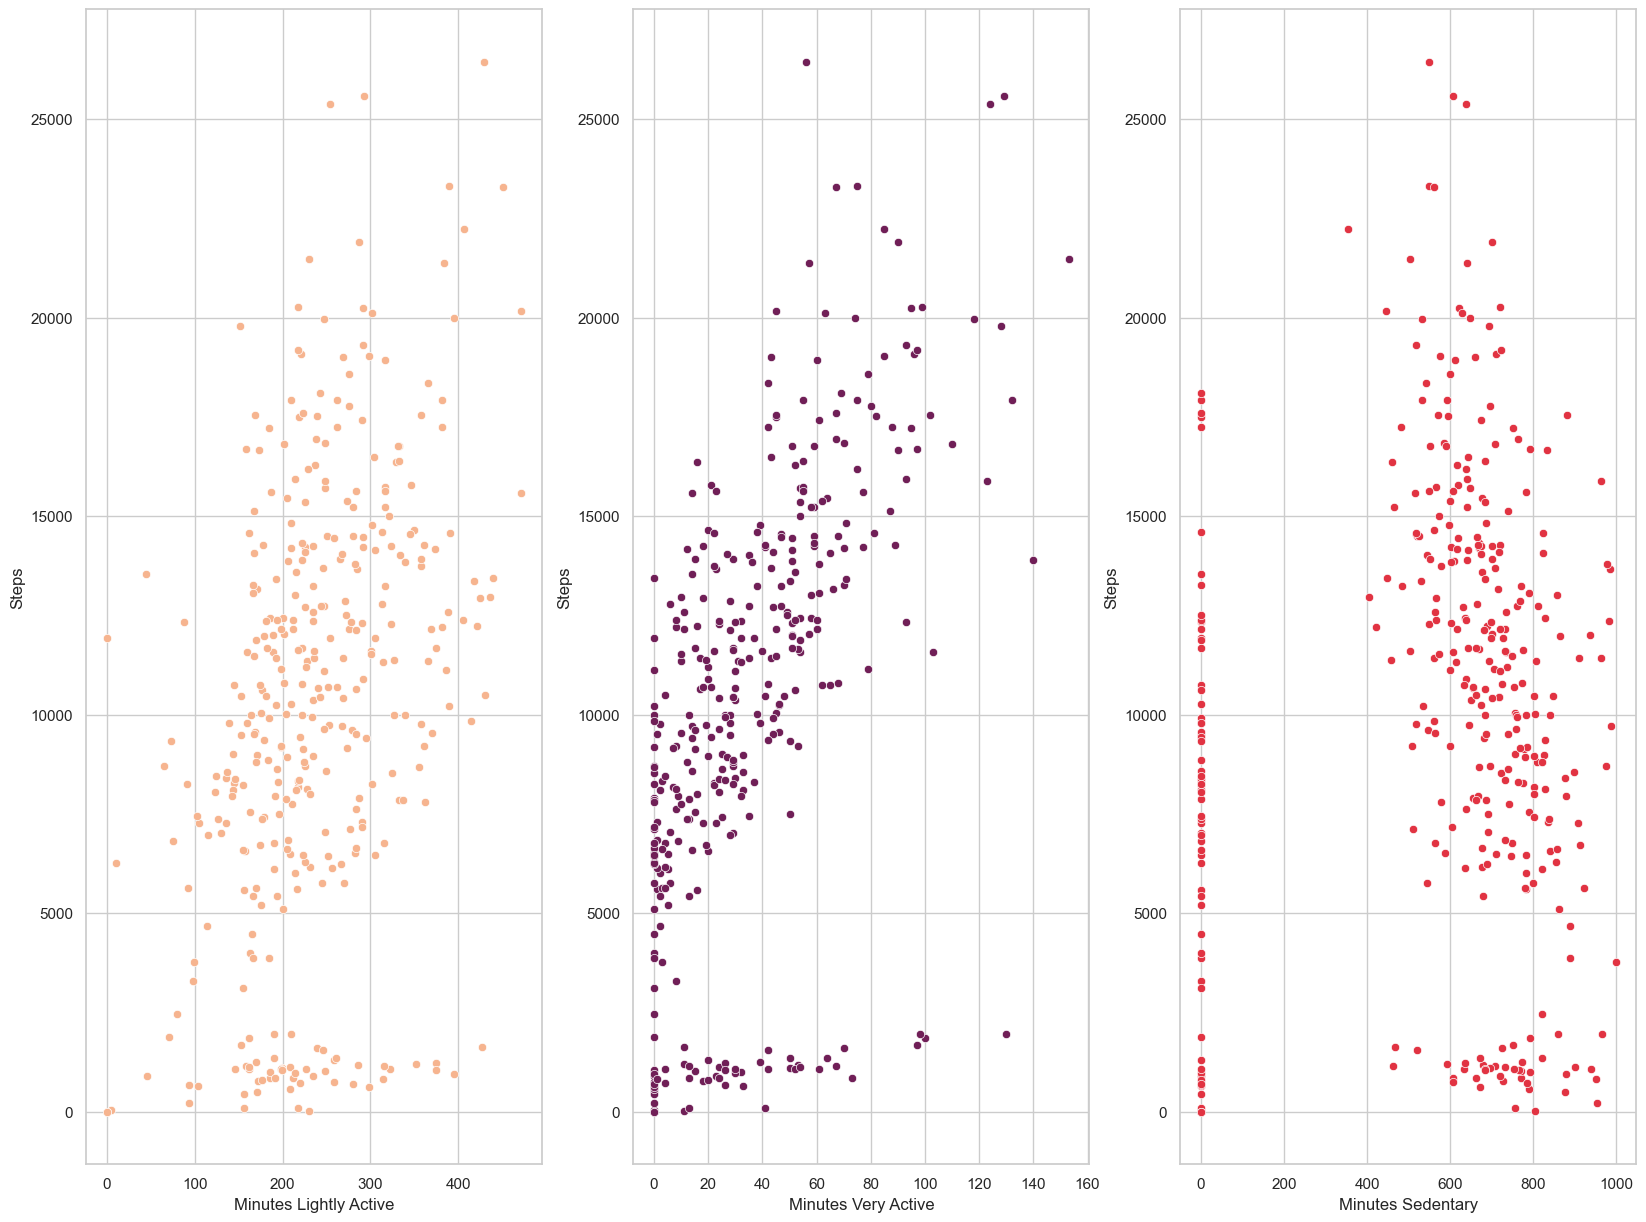

In [186]:
activity_to_plot = ["Minutes Lightly Active", "Minutes Very Active", "Minutes Sedentary"]
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,15))
for activity in activity_to_plot:
    sns.scatterplot(x=activity, y="Steps", data=fitbit, ax=axs[activity_to_plot.index(activity)], color = random.choice(sns.color_palette("rocket")))


## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [162]:
titanic = pd.read_csv("../data/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [163]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [192]:
# NUMERICAL VARIABLES
titanic.select_dtypes(include="object")

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


In [ ]:
# CATEGORICAL VARIABLES
titanic.select_dtypes(include="number")

#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [201]:
plt.style.use="classic"
sns.set(rc={"figure.figsize": (12.,6.)})

#### Use the right visulalization to show the distribution of column `Age`.

(array([ 72.,  78., 326., 347., 220., 136.,  75.,  42.,  10.,   3.]),
 array([ 0.17 ,  8.153, 16.136, 24.119, 32.102, 40.085, 48.068, 56.051,
        64.034, 72.017, 80.   ]),
 <BarContainer object of 10 artists>)

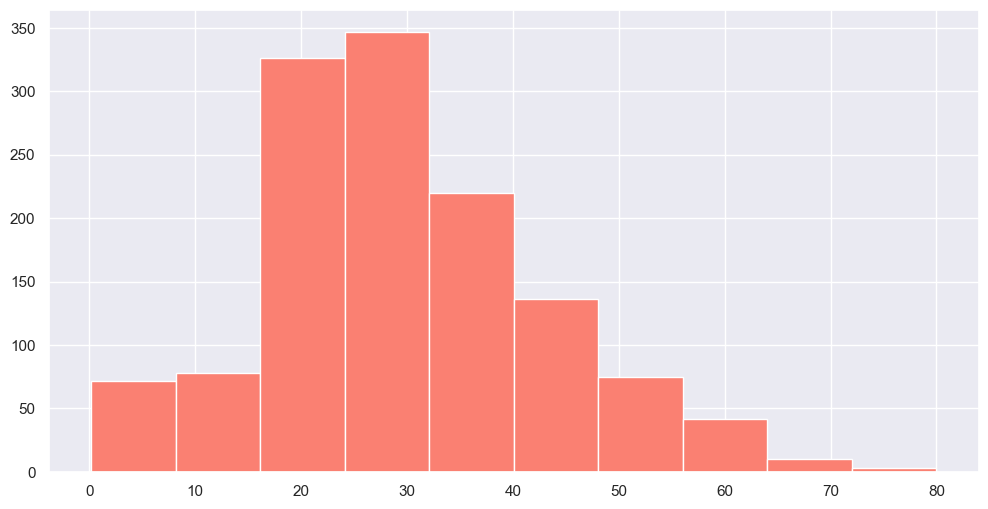

In [209]:
plt.hist(titanic['Age'], color = 'salmon')

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

(array([ 22.,  19.,  10.,  11.,  10.,  13.,   8.,   8.,  23.,  26.,  20.,
         75.,  29.,  93., 109.,  43.,  72.,  68., 111.,  53.,  71.,  47.,
         35.,  24.,  43.,  26.,  29.,  15.,  35.,  31.,  15.,  26.,   7.,
         14.,  13.,   5.,   9.,   8.,  11.,   9.,   3.,   2.,   0.,   2.,
          3.,   0.,   1.,   1.,   0.,   1.]),
 array([ 0.17  ,  1.7666,  3.3632,  4.9598,  6.5564,  8.153 ,  9.7496,
        11.3462, 12.9428, 14.5394, 16.136 , 17.7326, 19.3292, 20.9258,
        22.5224, 24.119 , 25.7156, 27.3122, 28.9088, 30.5054, 32.102 ,
        33.6986, 35.2952, 36.8918, 38.4884, 40.085 , 41.6816, 43.2782,
        44.8748, 46.4714, 48.068 , 49.6646, 51.2612, 52.8578, 54.4544,
        56.051 , 57.6476, 59.2442, 60.8408, 62.4374, 64.034 , 65.6306,
        67.2272, 68.8238, 70.4204, 72.017 , 73.6136, 75.2102, 76.8068,
        78.4034, 80.    ]),
 <BarContainer object of 50 artists>)

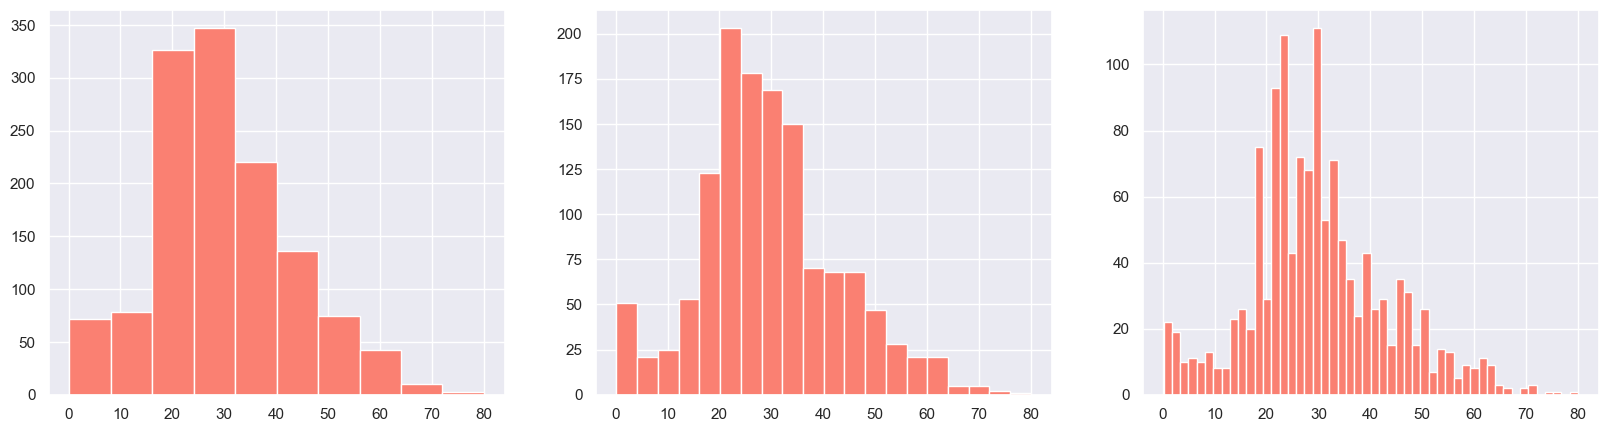

In [218]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

axs[0].hist(titanic['Age'], color = 'salmon', bins=10)
axs[1].hist(titanic['Age'], color = 'salmon', bins=20)
axs[2].hist(titanic['Age'], color = 'salmon', bins=50)


#### How does the bin size affect your plot?

In [ ]:
"""
aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa
"""

#### Use seaborn to show the distribution of column `Age`.

In [ ]:
# your code here

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

In [ ]:
# Method 1 - matplotlib
# your code here

In [ ]:
# Method 2 - seaborn
# your code here

#### Use the right plot to visualize the column `Pclass`.

In [ ]:
# your code here

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
your comments here
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

In [ ]:
# your code here

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
your comments here
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

In [ ]:
# Method 1 - matplotlib
# your code here

In [ ]:
# Method 2 - seaborn
# your code here

#### Plot the correlation matrix using seaborn.

In [ ]:
# your code here

#### What are the most correlated features?

In [ ]:
"""
your comments here
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

In [ ]:
# your code here

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

In [ ]:
# your code here